In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import math
import numpy as np

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [97]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222142 entries, 0 to 222141
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    222142 non-null  object 
 1   continent                                   209378 non-null  object 
 2   location                                    222142 non-null  object 
 3   date                                        222142 non-null  object 
 4   total_cases                                 212994 non-null  float64
 5   new_cases                                   212754 non-null  float64
 6   new_cases_smoothed                          211558 non-null  float64
 7   total_deaths                                193862 non-null  float64
 8   new_deaths                                  193821 non-null  float64
 9   new_deaths_smoothed                         192641 non-null  float64
 

In [5]:
data.shape

(222142, 67)

In [6]:
def missing_values_table(df,cutoff_ratio):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected stage_dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    mask = mis_val_table_ren_columns['% of Total Values']>cutoff_ratio
    return mis_val_table_ren_columns[mask]

In [7]:
columns_with_major_missing_issue = missing_values_table(data,80)
columns_with_major_missing_issue

Your selected stage_dataframe has 67 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
weekly_icu_admissions_per_million,214825,96.7
weekly_icu_admissions,214825,96.7
excess_mortality_cumulative_per_million,214682,96.6
excess_mortality_cumulative,214682,96.6
excess_mortality_cumulative_absolute,214682,96.6
excess_mortality,214635,96.6
weekly_hosp_admissions_per_million,207850,93.6
weekly_hosp_admissions,207850,93.6
icu_patients_per_million,193904,87.3
icu_patients,193904,87.3


In [8]:
China_data=data[data['location']=='China']
China_data.shape

(990, 67)

In [9]:
missing_values_table(China_data,0).head(5)

Your selected stage_dataframe has 67 columns.
There are 45 columns that have missing values.


,Missing Values,% of Total Values
excess_mortality_cumulative_per_million,990,100.0
icu_patients_per_million,990,100.0
new_tests_per_thousand,990,100.0
new_tests,990,100.0
weekly_hosp_admissions_per_million,990,100.0


In [10]:
datetime.strptime(China_data['date'].iloc[0], '%Y-%m-%d').date()

datetime.date(2020, 1, 22)

In [11]:
China_data['date']=China_data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

C:\Users\Qing\AppData\Local\Temp\ipykernel_2320\3530846132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  China_data['date']=China_data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())


Text(0.5, 1.0, 'total deaths trends in time')

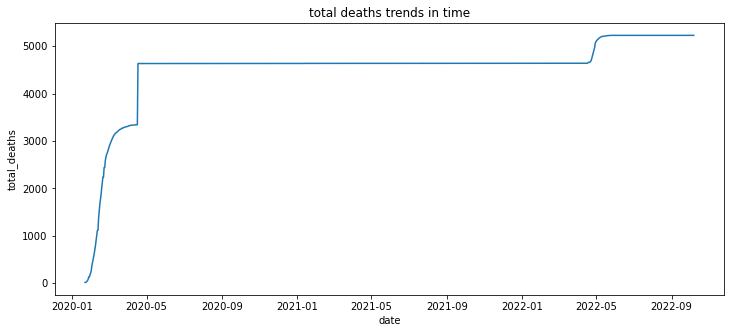

In [12]:
import seaborn as sns
plt.figure(figsize=[12,5])
sns.lineplot(China_data,x='date',y='total_deaths')
plt.title("total deaths trends in time")

Now we want to see the world trend. However, it is difficult because

In [13]:
print("The total number of regions in the dataset:")
regions = list(data['iso_code'].unique())
data['iso_code'].nunique()

The total number of regions in the dataset:


244

In [14]:
print(data[data['date']==data['date'].iloc[0]].shape[0])
"""When we choose a random date, the number of regions reporting is not all."""

62


'When we choose a random date, the number of regions reporting is not all.'

In [15]:
def replace_nan(x):
    if math.isnan(x):
        return 0
    else:
        return x
data['new_deaths_repalce_nan']=data['new_deaths'].apply(lambda x: replace_nan(x))

In [23]:
data['new_deaths_repalce_nan']
data['date']=data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

Therefore, we try to use new deaths summation and integral to calculate total_deaths to circumvent the situation.

In [24]:
world_death_df = data[['new_deaths_repalce_nan','date']].groupby(['date']).sum()
world_death_df

,new_deaths_repalce_nan
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0
...,...
2022-10-03,5244.0
2022-10-04,6569.0
2022-10-05,8898.0


Text(0.5, 1.0, 'new deaths trends in time')

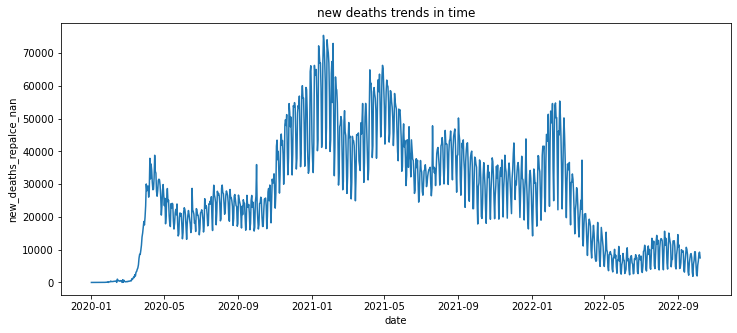

In [25]:
plt.figure(figsize=[12,5])
sns.lineplot(world_death_df,x='date',y='new_deaths_repalce_nan')
plt.title("new deaths trends in time")

In [26]:
world_death_df['total_deaths']=world_death_df['new_deaths_repalce_nan'].cumsum(axis=0)

Text(0.5, 1.0, 'total deaths trends in time')

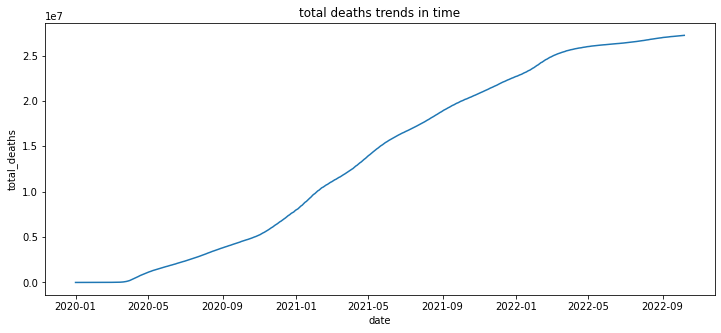

In [27]:
plt.figure(figsize=[12,5])
sns.lineplot(world_death_df,x='date',y='total_deaths')
plt.title("total deaths trends in time")

YEAH!!!

Now we want to see the regions where most covid cases occur, in 2020, 2021 and 2022

In [110]:
def not_a_general_region(x):
    if x[:4]!= 'OWID':
        return True
    else:
        return False
data['not_a_general_region'] = data['iso_code'].apply(lambda x:not_a_general_region(x))

In [111]:
region_specific_df = data[data['not_a_general_region'] == True]

In [112]:
data_2020 = region_specific_df[region_specific_df['date']< datetime(2021, 1, 1).date()]
data_2021 = region_specific_df[(region_specific_df['date']> datetime(2021, 1, 1).date()) & (region_specific_df['date'] < datetime(2022, 1, 1).date())]
data_2022 = region_specific_df[region_specific_df['date']> datetime(2022, 1, 1).date()]

In [113]:
top5_2020 = data_2020[['new_cases','location']].groupby(['location']).sum().sort_values(by='new_cases', ascending=False).head(5)
top5_2021 = data_2021[['new_cases','location']].groupby(['location']).sum().sort_values(by='new_cases', ascending=False).head(5)
top5_2022 = data_2022[['new_cases','location']].groupby(['location']).sum().sort_values(by='new_cases', ascending=False).head(5)

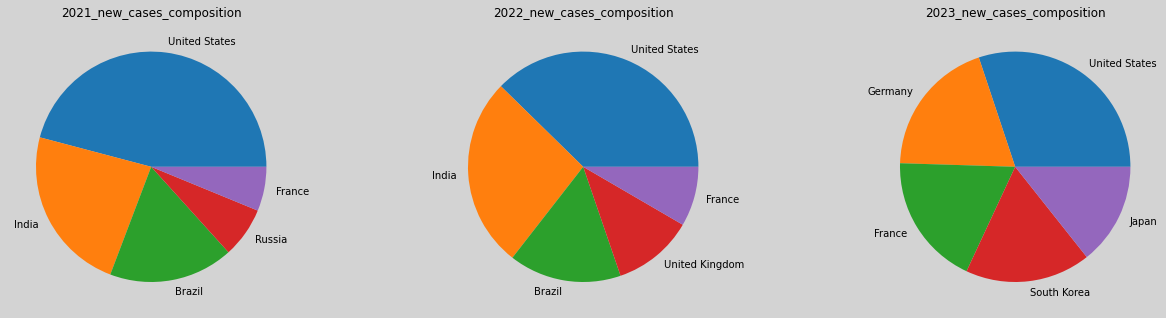

In [96]:
colors={'France':'purple',}
fig=plt.figure()
ax1=fig.add_axes([0,0,1,1],title='2021_new_cases_composition')
ax2=fig.add_axes([1,0,1,1],title = '2022_new_cases_composition')
ax3=fig.add_axes([2,0,1,1],title = '2023_new_cases_composition')
ax1.pie(top5_2020['new_cases'],labels =list(top5_2020.index))
ax2.pie(top5_2021['new_cases'],labels =list(top5_2021.index))
ax3.pie(top5_2022['new_cases'],labels =list(top5_2022.index))
fig.set_facecolor('lightgrey')


Now we want to see the number of new cases in 6 continents, in 2020, 2021 and 2022

In [116]:
region_general_df = data[data['not_a_general_region'] == False]
region_general_df = region_general_df[region_general_df['location']!='World']
region_general_df['location'].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'International', 'Kosovo', 'Low income', 'Lower middle income',
       'North America', 'Northern Cyprus', 'Oceania', 'South America',
       'Upper middle income'], dtype=object)

In [120]:
continents = ['Africa','Asia','Europe','North America','South America','Oceania']
continents_df = region_general_df[data['location'].apply(lambda x: x in continents)]
continents_df.head(5)

C:\Users\Qing\AppData\Local\Temp\ipykernel_2320\2891346662.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  continents_df = region_general_df[data['location'].apply(lambda x: x in continents)]


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,new_deaths_repalce_nan,not_a_general_region
957,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
958,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
959,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
960,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
961,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False


In [121]:
continents_2020 = continents_df[continents_df['date']< datetime(2021, 1, 1).date()]
continents_2021 = continents_df[(continents_df['date']> datetime(2021, 1, 1).date()) & (continents_df['date'] < datetime(2022, 1, 1).date())]
continents_2022 = continents_df[continents_df['date']> datetime(2022, 1, 1).date()]

In [125]:
top5_con_2020 = continents_2020[['new_cases','location']].groupby(['location']).sum().sort_values(by='new_cases',ascending=False)
top5_con_2021 = continents_2021[['new_cases','location']].groupby(['location']).sum().sort_values(by='new_cases',ascending=False)
top5_con_2022 = continents_2022[['new_cases','location']].groupby(['location']).sum().sort_values(by='new_cases',ascending=False)

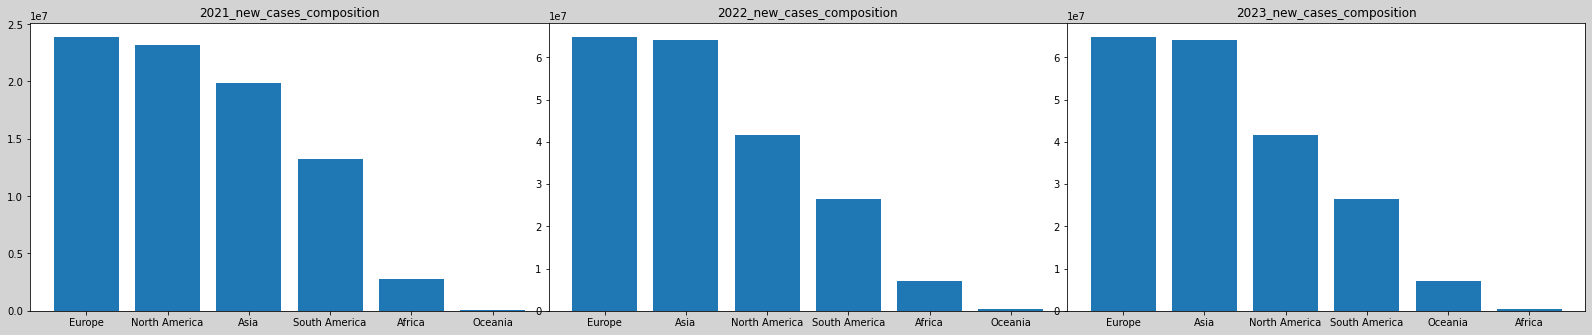

In [137]:
fig=plt.figure()
ax1=fig.add_axes([0,0,1.2,1],title='2021_new_cases_composition')
ax2=fig.add_axes([1.2,0,1.2,1],title = '2022_new_cases_composition')
ax3=fig.add_axes([2.4,0,1.2,1],title = '2023_new_cases_composition')
ax1.bar(x = list(top5_con_2020.index),height=top5_con_2020['new_cases'])
ax2.bar(x = list(top5_con_2021.index),height=top5_con_2021['new_cases'])
ax3.bar(x = list(top5_con_2022.index),height=top5_con_2021['new_cases'])
fig.set_facecolor('lightgrey')


Is there a relationship between vaccine percentage and new_cases?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


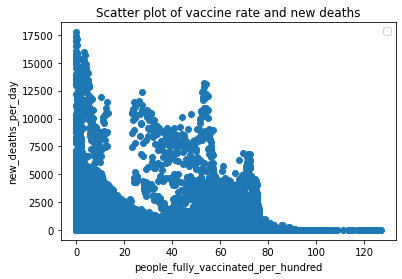

In [183]:
plt.figure()
plt.scatter(data['people_fully_vaccinated_per_hundred'],data['new_deaths'])
plt.title('Scatter plot of vaccine rate and new deaths')
plt.xlabel('people_fully_vaccinated_per_hundred')
plt.ylabel('new_deaths_per_day')
plt.legend()

From the graph, higher vaccine rate leads to lower death number.


We further validates the hypothesis through heat map:

<AxesSubplot:>

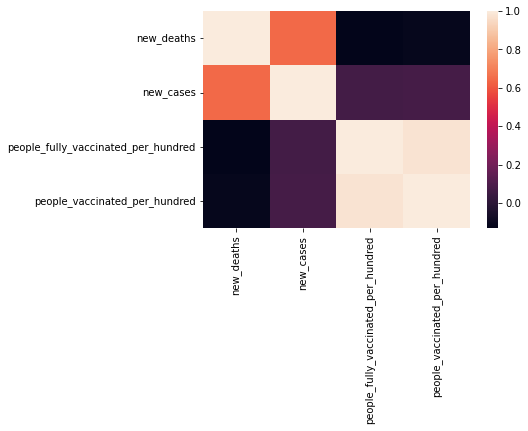

In [188]:
sns.heatmap(data[['new_deaths','new_cases','people_fully_vaccinated_per_hundred','people_vaccinated_per_hundred']].corr())

Positive corelation between vaccine and less deaths